# PyTorch Learning Rate Schedulers

In [1]:
from bisect import bisect_right

import matplotlib.pyplot as plt
import torch
from torch.optim import SGD
from torch.optim.lr_scheduler import (
    ConstantLR,
    CosineAnnealingLR,
    CosineAnnealingWarmRestarts,
    ExponentialLR,
    LinearLR,
    MultiplicativeLR,
    SequentialLR,
    StepLR,
)

**ConstantLR**

For a fixed number of steps, the lr is set to the initial lr times a constant factor, then it returns to the initial value.

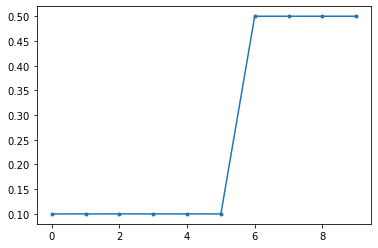

In [2]:
model = torch.nn.Linear(2, 2)
optim = SGD(model.parameters(), lr=0.5)
scheduler = ConstantLR(optim, factor=0.2, total_iters=6)
lr = []
for _ in range(10):
    lr.append(optim.param_groups[0]["lr"])
    optim.step()
    scheduler.step()
plt.plot(lr, marker=".");

**MultiplicativeLR**

At each step, multiply the current lr by a factor that is obtained through a function passed as parameter.

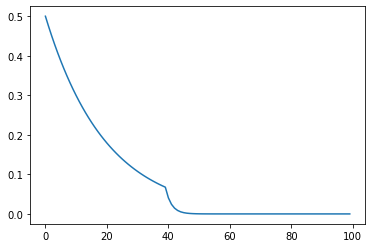

In [3]:
model = torch.nn.Linear(2, 2)
optim = SGD(model.parameters(), lr=0.5)
scheduler = MultiplicativeLR(optim, lambda s: 0.95 if s < 40 else 0.6)
lr = []
for _ in range(100):
    lr.append(optim.param_groups[0]["lr"])
    optim.step()
    scheduler.step()
plt.plot(lr);

**LinearLR**

At each step, the lr is set to the initial lr times a factor. The factor is given by `linspace(start, end, total_iters)[step]`

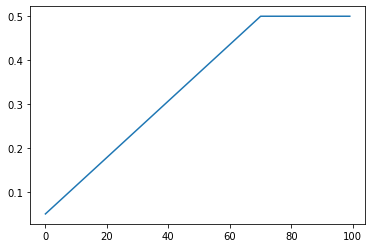

In [4]:
model = torch.nn.Linear(2, 2)
optim = SGD(model.parameters(), lr=0.5)
scheduler = LinearLR(optim, start_factor=0.1, end_factor=1.0, total_iters=70)
lr = []
for _ in range(100):
    lr.append(optim.param_groups[0]["lr"])
    optim.step()
    scheduler.step()
plt.plot(lr);

**ExponentialLR**

At each step, multiply the current lr by a fixed factor.

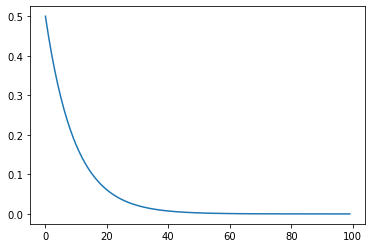

In [5]:
model = torch.nn.Linear(2, 2)
optim = SGD(model.parameters(), lr=0.5)
scheduler = ExponentialLR(optim, gamma=0.9)
lr = []
for _ in range(100):
    lr.append(optim.param_groups[0]["lr"])
    optim.step()
    scheduler.step()
plt.plot(lr);

**StepLR**

Every N steps, multiply the current lr by a fixed factor.

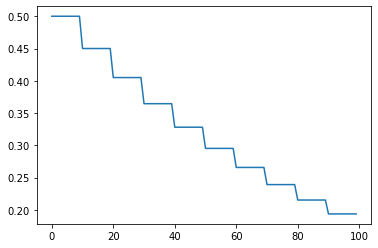

In [6]:
model = torch.nn.Linear(2, 2)
optim = SGD(model.parameters(), lr=0.5)
scheduler = StepLR(optim, gamma=0.9, step_size=10)
lr = []
for _ in range(100):
    lr.append(optim.param_groups[0]["lr"])
    optim.step()
    scheduler.step()
plt.plot(lr);

**CosineAnnealingLR**

Over a given number of epochs, decrease the learning rate from the initial lr to a given value.
The decrease follows the first half of a cosine curve.
Going past the specified number of epochs results in a periodic behavior.

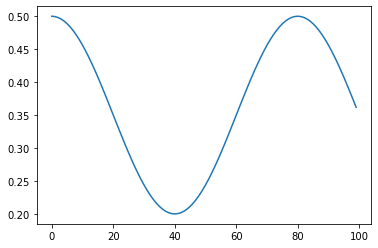

In [7]:
model = torch.nn.Linear(2, 2)
optim = SGD(model.parameters(), lr=0.5)
scheduler = CosineAnnealingLR(optim, T_max=40, eta_min=0.2)
lr = []
for _ in range(100):
    lr.append(optim.param_groups[0]["lr"])
    optim.step()
    scheduler.step()
plt.plot(lr);

**CosineAnnealingWarmRestarts**

Over a given number of epochs, decrease the learning rate from the initial lr to a given value.
The decrease follows the first half of a cosine curve.
After each cycle, the lr returns immediately to its initial value and a new cycle begins.
The duration of the new cycle is `T_mult` times the duration of the previous one.

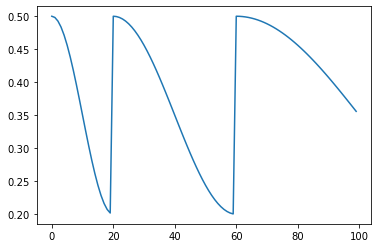

In [8]:
model = torch.nn.Linear(2, 2)
optim = SGD(model.parameters(), lr=0.5)
scheduler = CosineAnnealingWarmRestarts(optim, T_0=20, T_mult=2, eta_min=0.2)
lr = []
for _ in range(100):
    lr.append(optim.param_groups[0]["lr"])
    optim.step()
    scheduler.step()
plt.plot(lr);

**SequentialLR**

The original `SequentialLR` gives deprecation warnings and does something weird in the `step` function.
This simpler sequential scheduler does the job for the two examples below.

In [9]:
class MySequentialLR(SequentialLR):
    def step(self):
        self.last_epoch += 1
        idx = bisect_right(self._milestones, self.last_epoch)
        self._schedulers[idx].step()

In sequence:
- Linear warmup
- Exponential decay
- Keep fixed

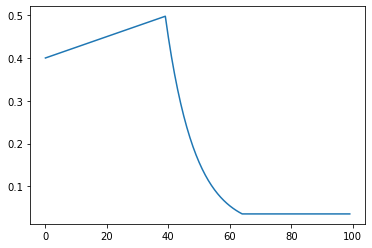

In [10]:
model = torch.nn.Linear(2, 2)
optim = SGD(model.parameters(), lr=0.5)
scheduler = MySequentialLR(
    optim,
    schedulers=[
        LinearLR(optim, start_factor=0.8, end_factor=1.0, total_iters=40),
        ExponentialLR(optim, gamma=0.9),
        MultiplicativeLR(optim, lambda _: 1.0),
    ],
    milestones=[40, 65],
)
lr = []
for _ in range(100):
    lr.append(optim.param_groups[0]["lr"])
    optim.step()
    scheduler.step()
plt.plot(lr);

In sequence:
- Linear warmup
- Cosine decay one cycle
- Keep fixed

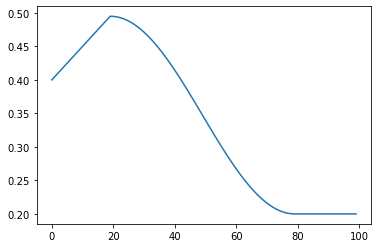

In [11]:
model = torch.nn.Linear(2, 2)
optim = SGD(model.parameters(), lr=0.5)
scheduler = MySequentialLR(
    optim,
    schedulers=[
        LinearLR(optim, start_factor=0.8, end_factor=1.0, total_iters=20),
        CosineAnnealingLR(optim, T_max=60, eta_min=0.2),
        MultiplicativeLR(optim, lambda _: 1.0),
    ],
    milestones=[20, 80],
)
lr = []
for _ in range(100):
    lr.append(optim.param_groups[0]["lr"])
    optim.step()
    scheduler.step()
plt.plot(lr);